衛星の回転運動モデル

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 60
nx = 4
ny = 1

F = np.matrix([[1, 1, 0.5, 0.5],
              [0, 1,   1,   1],
              [0, 0,   1,   0],
              [0, 0,   0, 0.606]]) # 遷移行列
H = np.matrix([1,0,0,0])  # 観測行列
R = np.matrix([1]) # 観測ノイズ共分散行列
G = np.matrix([0,0,0,1])
q = 0.0064

x = np.zeros([N,nx])  # 状態ベクトル(真値)
y = np.zeros([N,ny])  # 観測ベクトル

In [3]:
x[0,:] = np.array([1.25, 0.06, 0.01, -0.003])

for i in range(1,N):
    x[i,:] = F.dot(x[i-1]) + G*np.random.normal(0, q)
    y[i,:] = H.dot(x[i,:]) + np.random.normal(0, R)

In [4]:
# カルマンフィルター
xp = np.zeros([N, nx])     # 一期先予測
Pp = np.zeros([N, nx, nx]) # 一期先共分散

xp[0,:] = np.array([0,0,0,0])  # 初期推定値
Pp[0,:,:] = np.diag([10,10,10,10]) # 初期共分散

xu = np.copy(xp)   # フィルタ予測
Pu = np.copy(Pp)   # フィルタ共分散

for i in range(1,N):
    # 時間更新ステップ
    xp[i,:] = F.dot(xu[i-1,:])
    Pp[i,:,:] = F.dot(Pu[i-1,:,:]).dot(F.T) + G.dot(q).dot(G.T)
    # 観測更新ステップ
    K = Pp[i,:,:].dot(H.T).dot(np.linalg.inv(H.dot(Pp[i,:,:]).dot(H.T)+R))
    xu[i,:] = xp[i,:] + K.dot(y[i,:] - H.dot(xp[i,:])).squeeze()
    Pu[i,:,:] = Pp[i,:,:] - K.dot(H).dot(Pp[i])

Text(0.5, 0, 'Number of steps t')

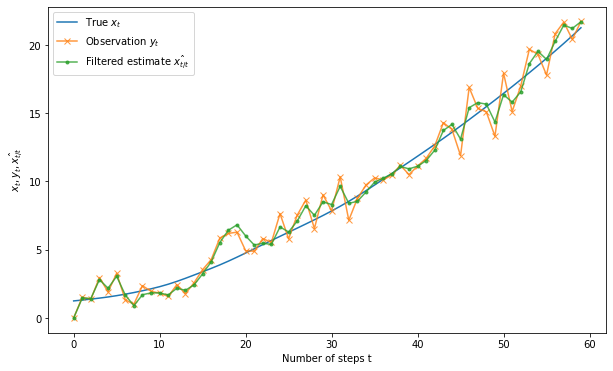

In [5]:
plt.figure(figsize=(10,6))
plt.plot(x[:,0], label="True $x_t$")
plt.plot(y[:,0], marker="x", alpha=0.8, label="Observation $y_t$")
plt.plot(xu[:,0], marker=".", alpha=0.8, label="Filtered estimate $\hat{x_{t/t}}$")
plt.legend()
plt.ylabel("$x_t,y_t,\hat{x_{t/t}}$")
plt.xlabel("Number of steps t")

In [6]:
# カルマンスムーザー
xs = np.zeros([N, nx])     
Ps = np.zeros([N, nx, nx]) 

xs[-1,:] = xu[-1,:]
Ps[-1,:,:] = Pu[-1,:,:]

for i in reversed(range(N-1)):
    # 平滑化ステップ
    C = Pu[i,:,:].dot(F.T).dot(np.linalg.inv(Pp[i+1,:,:]))
    Ps[i,:,:] = Pu[i,:,:] + C.dot(Ps[i+1,:,:]-Pp[i+1,:,:]).dot(C.T)
    xs[i,:] = xu[i,:] + C.dot(xs[i+1]-xp[i+1])

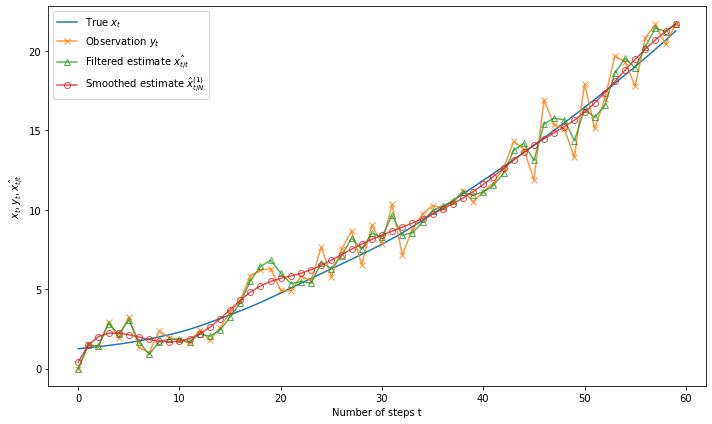

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x[:,0], label="True $x_t$")
plt.plot(y[:,0], marker="x", alpha=0.8, label="Observation $y_t$")
plt.plot(xu[:,0], marker="^", alpha=0.8, markerfacecolor="None", label="Filtered estimate $\hat{x_{t/t}}$")
plt.plot(xs[:,0], marker="o", alpha=0.8, markerfacecolor="None", label="Smoothed estimate $\hat{x}_{t/N}^{(1)}$")
plt.legend()
plt.ylabel("$x_t,y_t,\hat{x_{t/t}}$")
plt.xlabel("Number of steps t")
plt.tight_layout()
plt.savefig("ex2_image.png")